In [120]:
#@title Importando as libs
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
caminho_padrao = '/content/drive/MyDrive/PythonPowerbi'

In [124]:
produtos_df =  pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Cadastro Produtos.csv'),sep=';' ,decimal=',', encoding='latin-1')
lojas_df =     pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Lojas.csv')            ,sep=';' ,decimal=',', encoding='latin-1')
clientes_df =  pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Clientes.csv')         ,sep=';' ,decimal=',', encoding='latin-1')
promocoes_df = pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Promocoes.csv')        ,sep=';' ,decimal=',', encoding='latin-1')
vendas_df =    pd.read_csv(os.path.join(caminho_padrao, 'Contoso - Vendas - 2017.csv')    ,sep=';' ,decimal=',', encoding='latin-1')

In [125]:
#@title Renomenado as colunas
clientes_df = clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'})
produtos_df = produtos_df.rename(columns={'ÿNome da Marca' : 'Nome da Marca'})
lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})


In [126]:
#@title Limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome da Marca']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

In [127]:
#@title Mesclando e renomeando os DataFrames
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df =vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})

In [129]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,Southridge Video,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,The Phone Company,Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,Contoso,Loja Contoso Singapore,angela49@adventure-works.com
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,Contoso,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,Contoso,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,Contoso,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,Contoso,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,Adventure Works,Loja Contoso East Troy,lance5@adventure-works.com


In [139]:
dataset = vendas_df
tres_lojas_df = dataset[dataset['ID Loja'].isin([86, 306, 172])]
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')

display(tres_lojas_df)

<ipython-input-139-4dd62c3f81c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
98,99,2017-01-01,03/01/2017,2,306,1269,10,26238,8,0,Contoso,Loja Contoso Europe Online,edward17@adventure-works.com
125,126,2017-01-01,01/01/2017,0,172,1078,2,11357,4,0,Contoso,Loja Contoso Hartford,bsunners9y@blog.com
126,127,2017-01-01,01/01/2017,0,172,1648,2,16740,4,0,Contoso,Loja Contoso Hartford,gjewsterkm@indiegogo.com
165,166,2017-01-01,02/01/2017,1,306,1107,10,7242,16,0,Contoso,Loja Contoso Europe Online,khanhard6r@taobao.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980579,980580,2017-12-31,06/01/2018,6,306,771,10,6539,8,0,Contoso,Loja Contoso Europe Online,hgauntleyf0@smh.com.au
980580,980581,2017-12-31,01/01/2018,1,306,591,10,32061,8,0,Contoso,Loja Contoso Europe Online,gina18@adventure-works.com
980581,980582,2017-12-31,31/12/2017,0,306,1388,10,22838,8,0,Contoso,Loja Contoso Europe Online,alexa14@adventure-works.com
980582,980583,2017-12-31,03/01/2018,3,306,1354,10,33450,8,0,Contoso,Loja Contoso Europe Online,alexis3@adventure-works.com


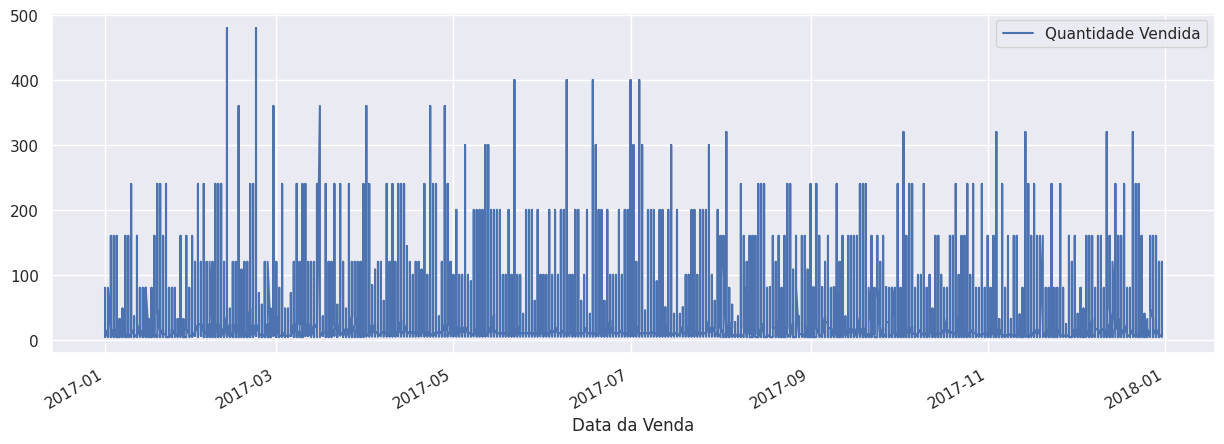

In [144]:
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
tres_lojas_df.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15,5))
plt.show()

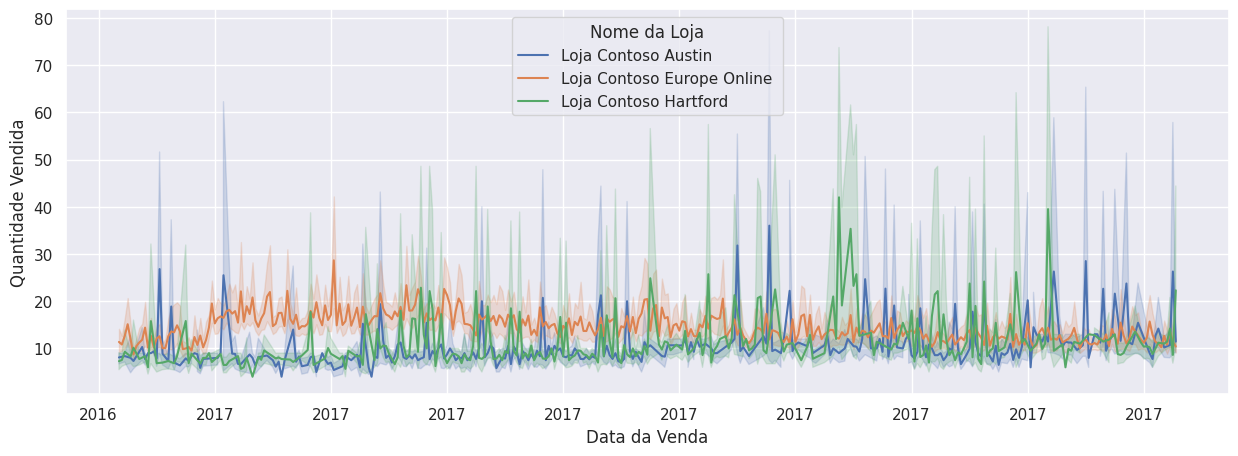

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja",data = tres_lojas_df)
plt.show()